### Data Science Project Life-Cycle
##### 1. Domain Understanding - 대상 분야 이해
##### 2. Data Understanding - 데이터 이해하기
##### 3. Data Exploration - 데이터 탐색
##### 4. Data Preparation - 데이터 준비
##### 5. Model Planning - 모델 기획
##### 6. Model Building - 모델 수립
##### 7. Communicate Results - 결과 토의
##### 8. Operationalize - 사내 시스템 적용

##### up-time -> 가동한 시간(생산한 시간)
##### down-time -> 멈춰있던 시간
##### up + down = 24h
''' down의 종류
1. scheduled -> 예정된 정비시간
2. un-scheduled -> 고장남
    un-scheduled 구성요소
    0) 문제 인지
    1) 연락 후 엔지니어 도착
    2) 문제 파악
    3) 문제해결
    4) 테스트 후 완료'''

# 데이터 준비단계
* 모델링 알고리즘에 집어넣기 위해 데이터 셋을 준비하는 단계
* 학습 / 평가용으로 데이터 셋 분리 -> row 분리
* feature / label 분리 -> column 분리
* A가 B에 영향을 주나? 또는 상관/연관이 있나? 라는 문장이 있다면
* 각 column은 A 또는 B에 들어간다
* A로 B설명 가능? 이라는 말과 같음
* A에 들어가는 컬럼들을 Feature(독립변수), B를 label(종속변수) 이라 한다.

In [1]:
import pandas as pd
df = pd.read_csv("processed.csv")
print(df.shape)
df.head()

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,2011-1


In [2]:
df.describe().columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [3]:
features= ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year',
       'month', 'day', 'hour', 'dayofweek']
label = 'count'
X, y = df[features], df[label]


# 학습의 분야
* 지도학습(supervised learning): 정답 있음, 평가를 할 수 있다
* 수치를 맞추는 경우(회귀, regression), 경우의 수를 맞추는 경우(분류, classification)
* 비지도학습(unsupervised learning): 정답 없음, 추천시스템
* 알고리즘이 데이터 안의 패턴을 스스로 찾아내게 만드는 과정

In [25]:
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import GradientBoostingRegressor as gb
model = dt()
# regressor 라는 것은 label(맞추고자 하는 값)이 수치인 경우
# 다음 주에 다룰 classifier는 label이 경우의 수입니다.
model.fit(X,y) # 공부
model.score(X,y) # 시험

1.0

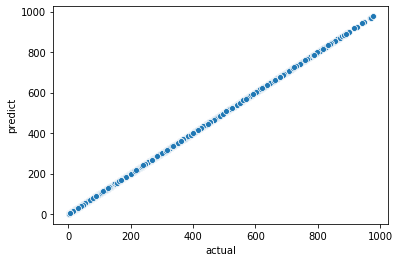

In [26]:
import seaborn as sns
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X)
for_plot['actual'] = y
sns.scatterplot(data=for_plot, x="actual", y="predict")

In [12]:
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5443, 13) (5443,)
(5443, 13) (5443,)


In [22]:
# dt, rf, gb
model = rf()
model.fit(X_train, y_train) # X 공부용문제지 y 공부용정답지 -> 공부
model.score(X_test, y_test) # 시험용문제지, 시헙용정답지 -> 시험

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9212873213207755

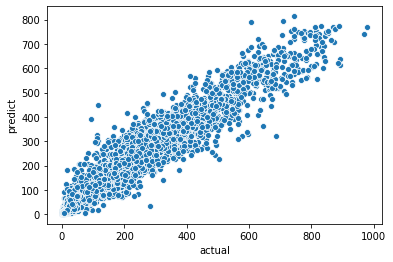

In [23]:
import seaborn as sns
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test
sns.scatterplot(data=for_plot, x="actual", y="predict")

##### feature selection - 변수 선택법
* 알고리즘에 집어넣을 변수를 선택하는 방법
* 알고리즘에 넣을 변수는 정확도가 유사하다면 변수 개수가 적을수록 좋습니다.
* 1. 단변량 (filter) -> 컬럼하나 정해서 한 컬럼이 유의미한지 확인(기초통계이용)
* 2. 전진/후진 선택법(wrapper) -> 하나씩 넣으면서 확인, 하나씩 빼면서 점수 확인
* 3. 임베드(embed) -> 알고리즘의 성질이용(알고리즘 내부를 뜯어볼 수 있는 경우)
* 4. SHAP, permutation importance 
* 알코반에서는 다루지 않음, 원래는 이 용도로 만들어진 것이 아님

In [29]:
model = rf()
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
print(train_score, test_score)

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9884513555353319 0.9186550489304252


##### filter method
* 한 컬럼만 딱 정해서 통계량을 뽑는 것입니다.
* ex) 표준편차가 0에 가깝다? 또는 다른 feature들과 상관관계가 너무 높다?

In [36]:
df["for_filter"] = 1
df.describe().T.sort_values('std')['std']

for_filter      0.000000
holiday         0.166599
workingday      0.466159
year            0.500019
weather         0.633839
season          1.116174
dayofweek       2.004585
month           3.444373
day             5.476608
hour            6.915838
temp            7.791590
windspeed       8.164537
atemp           8.474601
humidity       19.245033
casual         49.960477
registered    151.039033
count         181.144454
Name: std, dtype: float64

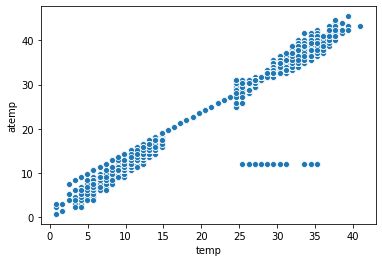

In [38]:
sns.scatterplot(data=df, x="temp", y="atemp")
# features(독립변수)중 다중 공산성 때문에 상관관계 너무 높아서 둘 중 하나는 뺴야한다

In [42]:
df.corr()
# 상관계수행렬 -> 절대값 0~1사이 1에 가까울 수록 크다 
# +면 양의 상관관계, -면 음의 상관관계

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,for_filter
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553,NaN
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832,NaN
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267,NaN
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692,NaN
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466,NaN
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235,NaN
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507,NaN
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804,NaN
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959,NaN
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427,NaN


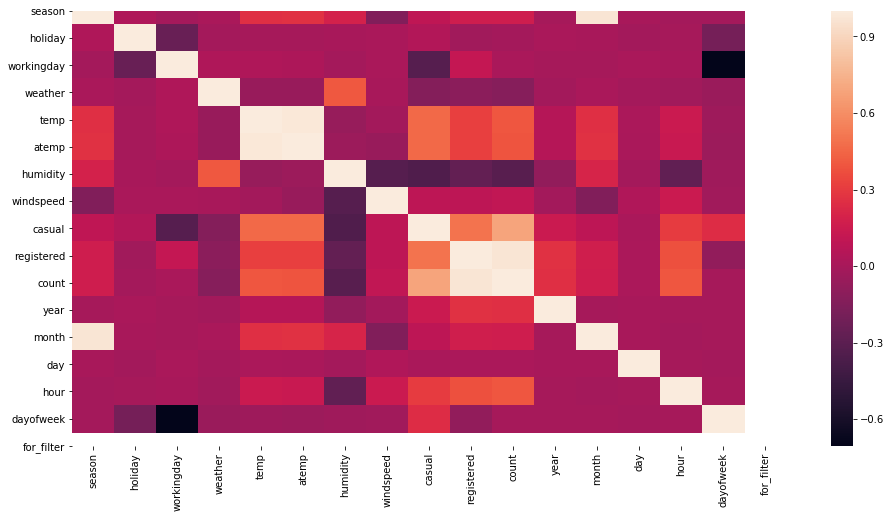

In [40]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(16,8)
sns.heatmap(df.corr(), ax = ax1)

##### filter 방식으로 변수 선택한 결과
* temp, atemp 사이에 상관계수가 높았기 때문에 둘 중 하나를 제거

In [45]:
features = ['season','holiday', 'workingday', 'weather', 'temp', 'humidity','windspeed','year','month','day','hour','dayofweek']

##### wrapper - 전진법/ 후진법
* feature에 변수를 추가/ 제거하면 모델의 성능이 달라질 것이다

In [50]:
def df_split(df, features, label):
    train, test = df[0::2], df[1::2]
    train, test = train.reset_index(), test.reset_index()
    X_train, y_train = train[features], train[label]
    X_test, y_test = test[features], test[label]
    return X_train, y_train, X_test, y_test

In [52]:
sample_features = ["temp", "holiday"]
X_train, y_train, X_test, y_test = df_split(df, sample_features, "count")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5443, 2) (5443,)
(5443, 2) (5443,)


In [54]:
from itertools import combinations as co
sample_bag = [1,2,3]
for c in co(sample_bag, 2):
    # co(sample_bag, 2)는 sample_bag 으로부터 2개를 뽑는 경우의 수
    print(c)

(1, 2)
(1, 3)
(2, 3)


##### 전진 선택법(Forward 방식)

In [59]:
all_result = []
for c in co(features, 2):
    X_train, y_train, X_test, y_test = df_split(df, list(c), "count")
    model = rf()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    sub_result = {"combination" : str(c), "score" : score}
    all_result.append(sub_result)
result_df = pd.DataFrame(all_result)

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [65]:
result_df.sort_values("score").tail()

,combination,score
43,"('temp', 'hour')",0.469709
9,"('season', 'hour')",0.499619
58,"('year', 'hour')",0.521098
65,"('hour', 'dayofweek')",0.559924
28,"('workingday', 'hour')",0.563348


In [66]:
feature_candidate = ['season','holiday', 'weather', 'temp', 'humidity','windspeed','year','month','day','dayofweek']

In [71]:
for c in feature_candidate:
    good_features = ["workingday", "hour"]
    good_features.append(c)
    X_train, y_train, X_test, y_test = df_split(df, good_features, "count")
    model = rf()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    sub_result = {"combination" :str(good_features), "score" : score}
    all_result.append(sub_result)
result_df = pd.DataFrame(all_result).sort_values(by="score")

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [72]:
result_df.tail()

,combination,score
73,"['workingday', 'hour', 'month']",0.572984
68,"['workingday', 'hour', 'weather']",0.584114
69,"['workingday', 'hour', 'temp']",0.625733
66,"['workingday', 'hour', 'season']",0.630148
72,"['workingday', 'hour', 'year']",0.661355


In [73]:
feature_candidate = ['season','holiday', 'weather', 'temp', 'humidity','windspeed','month','day','dayofweek']

In [74]:
for c in feature_candidate:
    good_features = ["workingday", "hour","year"]
    good_features.append(c)
    X_train, y_train, X_test, y_test = df_split(df, good_features, "count")
    model = rf()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    sub_result = {"combination" :str(good_features), "score" : score}
    all_result.append(sub_result)
result_df = pd.DataFrame(all_result).sort_values(by="score")

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [75]:
result_df.tail()

,combination,score
84,"['workingday', 'hour', 'year', 'dayofweek']",0.666080
78,"['workingday', 'hour', 'year', 'weather']",0.676423
76,"['workingday', 'hour', 'year', 'season']",0.806039
79,"['workingday', 'hour', 'year', 'temp']",0.825430
82,"['workingday', 'hour', 'year', 'month']",0.847620


##### 후진 제거방식(Backward 방식)
* 하나씩 제거하는 방식
* 전체 feature를 다 집어넣은 상태에서 시작
* 하나씩 빼 가면서 점수를 확인


In [83]:
all_result = []
for item in co(features, len(features)-1):
    target = list(item)
    X_train, y_train, X_test, y_test = df_split(df, target, "count")
    model = rf()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    dropped = set(features) - set(target)
    sub_result = {"dropped": dropped, "score" : score}
    all_result.append(sub_result)
result_df = pd.DataFrame(all_result).sort_values(by="score")

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [84]:
result_df.tail()

,dropped,score
9,{workingday},0.905318
2,{day},0.905855
11,{season},0.905954
3,{month},0.914364
5,{windspeed},0.917825


In [86]:
from sklearn.feature_selection import RFE
# recursive feature elimination
# 직접구현하지 않아도 이미 sklearn에 구현되어 있음
rfe = RFE(estimator = model)
rfe.fit(X_train, y_train)
# 머신러닝 알고리즘을 해석하는 알고리즘 
# 시간 꽤 오래걸림
for_rfe = pd.DataFrame()
for_rfe['ranking'] = rfe.ranking_
# ranking 대신에 support로 할 수도 있음 true는 넣고, false는 빼고!
# ranking은 순위가 나와서 좋음
for_rfe['features'] = X_train.columns
for_rfe.sort_values(by="ranking")

,ranking,features
1,1,workingday
3,1,temp
6,1,year
7,1,month
9,1,hour
4,2,humidity
10,3,dayofweek
2,4,weather
8,5,day
5,6,windspeed


##### embed(임베드방식) -알고리즘 내부를 뜯어볼 수 있는 경우
* 내부에서 각 feature 구성요소들이 얼마나 사용되었는지를 알아보는 방식
* 알고리즘 중에서는 내부에 변수의 중요도를 내포하고 있는 것들이 있음
* 이러한 알고리즘들을 이용해 변수의 중요도를 파악, 중요도 낮은 것을 지울 수 있음
* Tree 계열, Regularizer가 있는 경우
* Random Forest, Decision Tree 등이 Tree 계열
* L1(lasso), L2(ridge) regularizer가 있는 경우 L1 많이 사용


In [94]:
model = rf()
model.fit(X_train, y_train)
model.feature_importances_
# 변수(feature)의 중요도
X_train.columns

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [97]:
scores = pd.DataFrame()
scores['feature'] = X_train.columns
scores['importance'] = model.feature_importances_
scores = scores.sort_values(by='importance')
scores.head()

,feature,importance
0,holiday,0.002402
5,windspeed,0.008296
8,day,0.010952
2,weather,0.017562
4,humidity,0.030685


##### permutaion(순서) importance
* feature 하나 골라서 이 feature가 얼마나 중요한지 알고 싶을때
* 한 컬럼을 정해서 그 컬럼만 순서를 섞었을 때, 섞기 전후의 점수를 비교
* 알고리즘의 예측 정확도가 떨어질수록 잘 설명된 알고리즘일 것
* 섞었을 때 점수가 더 좋다면 지워야하는 컬럼

-> 이 수업에서는 다루지 않음

# kaggle 따라잡기

In [108]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [109]:
datetimer = train['datetime'].apply(lambda x: pd.to_datetime(x))
train['year'] = datetimer.apply(lambda x: x.year)
train['month'] = datetimer.apply(lambda x: x.month)
train['hour'] = datetimer.apply(lambda x: x.hour)
train['dayofweek'] = datetimer.apply(lambda x: x.dayofweek)

datetimer = test['datetime'].apply(lambda x: pd.to_datetime(x))
test['year'] = datetimer.apply(lambda x: x.year)
test['month'] = datetimer.apply(lambda x: x.month)
test['hour'] = datetimer.apply(lambda x: x.hour)
test['dayofweek'] = datetimer.apply(lambda x: x.dayofweek)

In [110]:
test.describe().columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

In [111]:
# data preparation 단계
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']
label = 'count'
X_train, y_train = train[features], train[label]
X_test = test[features]

In [112]:
# Modelling 단계
from sklearn.ensemble import RandomForestRegressor as rf
model = rf()
model.fit(X_train, y_train)
test["count"] = model.predict(X_test)

C:\Users\zeear\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
interested = ['datetime', 'count']
test[interested].to_csv("submit.csv", index=False)